### Getting the data

##### Please look at the information in the `get_data.ipynb` notebook. You have to end up with `swift.dkrz.de` folder located somwere in your system. All data used in this examples are located in this folder.  

In [1]:
import sys
sys.path.append("../")

import pyfesom as pf
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
# %matplotlib notebook
%matplotlib inline
from matplotlib import cm
from netCDF4 import Dataset, MFDataset

/mnt/lustre01/work/ab0995/a270088/miniconda2/envs/py35/lib/python3.5/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


In [2]:
basedir = '/mnt/lustre01/work/ab0995/a270088/DATA/swift.dkrz.de/'

First, as usuall load the mesh:

In [3]:
meshpath  = basedir+'/COREII/'
mesh = pf.load_mesh(meshpath, usepickle=True)

/mnt/lustre01/work/ab0995/a270088/DATA/swift.dkrz.de/COREII/pickle_mesh_py3
3
The usepickle == True)
The pickle file for python 3 exists.
The mesh will be loaded from /mnt/lustre01/work/ab0995/a270088/DATA/swift.dkrz.de/COREII/pickle_mesh_py3


Load data for one year:

In [4]:
fl = Dataset(basedir+'/COREII_data/fesom.1951.oce.mean.nc')

In [5]:
fl.variables['temp'].shape

(12, 3668773)

Select one month

In [6]:
data = fl.variables['temp'][0,:]

Decide start and end points of the transect and plot the map of your future transect. Use `%matplotlib notebook` if you whant to be able to zoom to the map. NOTE! you have to have cartopy installed to make the plotting work.

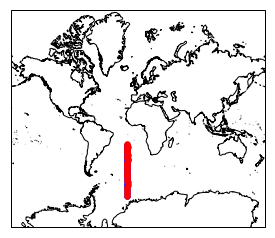

In [7]:
lon_start = -15
lat_start = -70
lon_end   = -15
lat_end   = -20
pf.plot_transect_map(lon_start, lat_start, lon_end, lat_end, 
                       mesh, npoints=30, view = 'w', stock_img=False)

We just use closest points for selection, so on the map blues dots show generated transect, while red points are  model points that will be used for "interpolation" (we will just use nearest neighbor aproach). 

Lets. now plot the transect from monthly data that we have extracted previously. There are plenty of parameters that you can control. Function `plot_transect` return instance of an image, so you can further modify it (font sizes and so on).

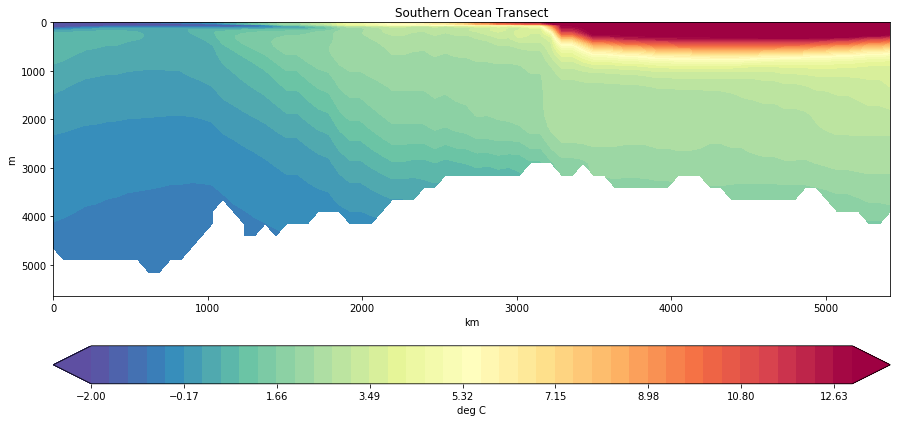

In [8]:
npoints = 80

fig, ax = plt.subplots(1,1, figsize=(15,7))
image = pf.plot_transect(data, mesh, 
                         lon_start,
                         lat_start,
                         lon_end,
                         lat_end,
                         npoints=npoints,
                         levels = np.round(np.linspace(-2, 13, 42),2),
                         cmap=cm.Spectral_r,
                         maxdepth =6000,
                         title = 'Southern Ocean Transect',
                         ncols=1,
                         figsize=(5,10),
                        ax = ax
                        )
cb = fig.colorbar(image, orientation='horizontal', ax=ax, pad=0.13)
cb.set_label('deg C')

If instead of kilometers you would like to have lons or lats, below is the code that will help you to do so :) Pay attention to combination of `npoints`, `lonlat[7::8]` (were in this case `7` is a starting point and `8` is a step). The `1` in `lonlat[7::8][:,1]` is latitudes, to switch to longitudes change it to `0`. This crazy thing `$^{\circ}$S` adds $^{\circ}$S, change to `N`, `E` or `W`, depending on what you would like to show. I know now it look ubly, in the future will try to make it more automatic. On the other hand you have control on what exactly you are ploting :)

In [9]:
npoints = 80
lonlat = pf.transect_get_lonlat(lon_start, lat_start, lon_end, lat_end, npoints=npoints)
labeles = [str(abs(int(x)))+"$^{\circ}$S" for x in lonlat[7::8][:,1]]
labeles

['65$^{\\circ}$S',
 '60$^{\\circ}$S',
 '55$^{\\circ}$S',
 '50$^{\\circ}$S',
 '45$^{\\circ}$S',
 '40$^{\\circ}$S',
 '35$^{\\circ}$S',
 '30$^{\\circ}$S',
 '25$^{\\circ}$S',
 '20$^{\\circ}$S']

Let's use it:

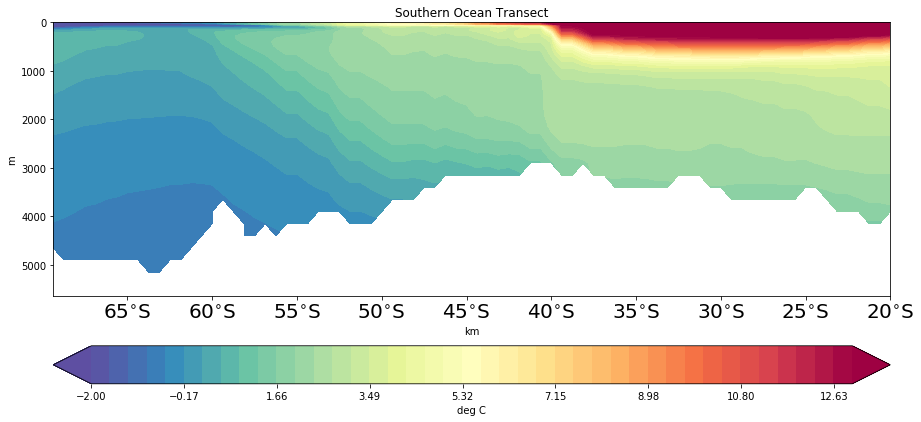

In [10]:
npoints = 80
lonlat = pf.transect_get_lonlat(lon_start, lat_start, lon_end, lat_end, npoints=npoints)
labeles = [str(abs(int(x)))+"$^{\circ}$S" for x in lonlat[7::8][:,1]]
dist   = pf.transect_get_distance(lonlat) # get's distances between starting point and present point

fig, ax = plt.subplots(1,1, figsize=(15,7))
image = pf.plot_transect(data, mesh, 
                         lon_start,
                         lat_start,
                         lon_end,
                         lat_end,
                         npoints=npoints,
                         levels = np.round(np.linspace(-2, 13, 42),2),
                         cmap=cm.Spectral_r,
                         maxdepth =6000,
                         title = 'Southern Ocean Transect',
                         ncols=1,
                         figsize=(5,10),
                        ax = ax
                        )
cb = fig.colorbar(image, orientation='horizontal', ax=ax, pad=0.13)
cb.set_label('deg C')
ax.xaxis.set_ticks(dist[7::8])
ax.set_xticklabels(labeles, size=20);

## Several transects at once

Let's get data for some other montsh, say April, July and October:

In [11]:
data1 = fl.variables['temp'][3,:]
data2 = fl.variables['temp'][6,:]
data3 = fl.variables['temp'][9,:]

Put all of them in to list:

In [13]:
data_all = [data, data1, data2, data3]

Now you can have several transects in a loop. Make sure you have changed number of rows (`nrows`), number of columns (`ncols`), `figsize` and other parameters at the top of the script :)

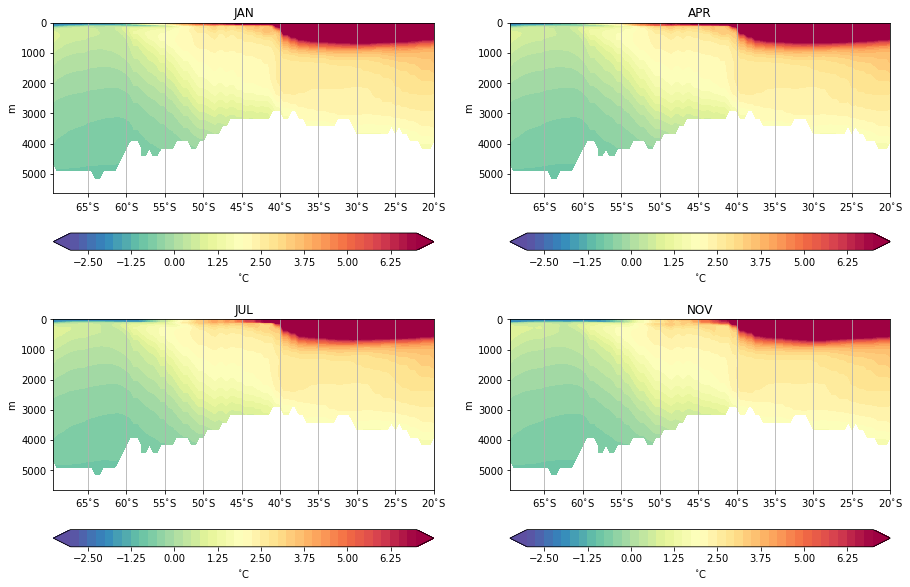

In [22]:
nrows = 2
ncols = 2
figsize = (15,10)
label = '$^{\circ}$C'
vmin = -2
vmax = 15
cmap = cm.Spectral_r
npoints = 100
cmap.set_bad(color = 'k', alpha = 1.)

lonlat = pf.transect_get_lonlat(lon_start, lat_start, lon_end, lat_end, npoints=npoints)
dist   = pf.transect_get_distance(lonlat)
labeles = [str(abs(int(x)))+"$^{\circ}$S" for x in lonlat[9::10][:,1]]

months = ['JAN', 'APR', 'JUL', 'NOV']
fig, ax = plt.subplots(nrows,ncols, figsize=figsize)
ax = ax.flatten()
# for i, sim in enumerate(data):
for i, sim in enumerate(data_all):   
    image = pf.plot_transect(sim, mesh, lon_start,
                      lat_start,
                      lon_end,
                      lat_end,
                      npoints=npoints,
                      levels = np.round(np.linspace(-3, 7, 41),2),
                      cmap=cmap,
                      maxdepth =6000,
                      label = '$^{\circ}$C',
                      title = months.pop(0),
                      ncols=3,
                      ax=ax[i])
    cb = fig.colorbar(image, orientation='horizontal', ax=ax[i], pad=0.16)
    cb.set_label(label)
    ax[i].xaxis.set_ticks(dist[9::10])
# ax.xaxis.set_ticks(list(range(lonlat.shape[0]))[9::10])
    ax[i].set_xticklabels(labeles, size=10)
    ax[i].set_xlabel(' ')
    ax[i].xaxis.grid(True)